In [1]:
# image processing
from PIL import Image

# data analysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# modeling
from sklearn.cluster import KMeans

C:\Users\82109\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\82109\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

## 1차 분석: 행정동별 상가수과 인구수 연관성 확인

1) 시흥시 상권 데이터 - 1차 가공

In [2]:
#데이터 불러오기
store = pd.read_csv('/행정동단위상가업소현황.csv', encoding='CP949', index_col=0, header=0, engine='python')

store.head()  #작업 내용 확인용 출력

,상호명,소재지지번주소,소재지도로명주소,소재지우편번호,WGS84경도,WGS84위도,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,건물명
시군명,,,,,,,,,,,,
가평군,해후,경기도 가평군 청평면 대성리 356-10,경기도 가평군 청평면 안대성길 26-1,12457.0,127.380150,37.696667,NaN,음식,커피점/카페,전통찻집/인삼찻집,비알콜 음료점업,NaN
가평군,유명맛집,경기도 가평군 가평읍 대곡리 230-3,경기도 가평군 가평읍 오리나무길 27,12420.0,127.514158,37.824988,NaN,음식,한식,한식/백반/한정식,한식 음식점업,조은장여관
가평군,이삭토스트,경기도 가평군 가평읍 읍내리 476-11,경기도 가평군 가평읍 가화로 97-1,12418.0,127.514137,37.828403,NaN,음식,패스트푸드,패스트푸드,그외 기타 음식점업,미래공인중개사
가평군,더하루풀빌라,경기도 가평군 상면 항사리 471-4,경기도 가평군 상면 한사간길 73,12445.0,127.360347,37.789734,NaN,숙박,모텔/여관/여인숙,모텔/여관/여인숙,여관업,NaN
가평군,양평해장국,경기도 가평군 청평면 상천리 1134,경기도 가평군 청평면 경춘로 1234,12449.0,127.447502,37.766986,청평점,음식,한식,해장국/감자탕,한식 음식점업,가평한우곰탕


In [3]:
# 데이터 가공
# 불필요한 데이터 제거
store_df1 = store.iloc[:, [0, 1, 7, 8, 9, 10]]
store_df1 = store_df1.loc['시흥시', :]

store_df1

,상호명,소재지지번주소,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명
시군명,,,,,,
시흥시,대궐봉평메밀막국수,경기도 시흥시 월곶동 420-2,음식,분식,국수/만두/칼국수,분식 및 김밥 전문점
시흥시,해뜨는어린이집,경기도 시흥시 정왕동 1851,학문/교육,유아교육,어린이집,보육시설 운영업
시흥시,수정어린이집,경기도 시흥시 정왕동 1875-5,학문/교육,유아교육,어린이집,보육시설 운영업
시흥시,미소담약국,경기도 시흥시 월곶동 1010-4,의료,약국/한약방,약국,의약품 및 의료용품 소매업
시흥시,별다래어린이집,경기도 시흥시 정왕동 2483,학문/교육,유아교육,어린이집,보육시설 운영업
...,...,...,...,...,...,...
시흥시,꼬마요정어린이집,경기도 시흥시 정왕동 1394-2,학문/교육,유아교육,어린이집,보육시설 운영업
시흥시,대광씽크,경기도 시흥시 대야동 476-20,소매,가정/주방/인테리어,주방가구판매,가구 소매업
시흥시,피터팬어린이집,경기도 시흥시 죽율동 317-7,학문/교육,유아교육,어린이집,보육시설 운영업


In [4]:
#컬럼명 변경
#store_df1.rename(columns={'상호명':'storename', '소재지지번주소':'address', '상권업종대분류명':'l-category','상권업종중분류명':'m-category', '상권업종소분류명':'s-category','표준산업분류명':'standard'})
store_df1.rename(columns={'소재지지번주소':'주소', '상권업종대분류명':'대분류명','상권업종중분류명':'중분류명', '상권업종소분류명':'소분류명'}, inplace = True)

In [5]:
#행정동 추출
store_df1['동'] = store_df1['주소'].str.split(' ').str[2]
store_df1

,상호명,주소,대분류명,중분류명,소분류명,표준산업분류명,동
시군명,,,,,,,
시흥시,대궐봉평메밀막국수,경기도 시흥시 월곶동 420-2,음식,분식,국수/만두/칼국수,분식 및 김밥 전문점,월곶동
시흥시,해뜨는어린이집,경기도 시흥시 정왕동 1851,학문/교육,유아교육,어린이집,보육시설 운영업,정왕동
시흥시,수정어린이집,경기도 시흥시 정왕동 1875-5,학문/교육,유아교육,어린이집,보육시설 운영업,정왕동
시흥시,미소담약국,경기도 시흥시 월곶동 1010-4,의료,약국/한약방,약국,의약품 및 의료용품 소매업,월곶동
시흥시,별다래어린이집,경기도 시흥시 정왕동 2483,학문/교육,유아교육,어린이집,보육시설 운영업,정왕동
...,...,...,...,...,...,...,...
시흥시,꼬마요정어린이집,경기도 시흥시 정왕동 1394-2,학문/교육,유아교육,어린이집,보육시설 운영업,정왕동
시흥시,대광씽크,경기도 시흥시 대야동 476-20,소매,가정/주방/인테리어,주방가구판매,가구 소매업,대야동
시흥시,피터팬어린이집,경기도 시흥시 죽율동 317-7,학문/교육,유아교육,어린이집,보육시설 운영업,죽율동


In [6]:
# 데이터 정렬(기준:'동')
store_df1 = store_df1.sort_values(by='동')
store_df1 = store_df1.reset_index()
store_df1

,시군명,상호명,주소,대분류명,중분류명,소분류명,표준산업분류명,동
0,시흥시,페리카나치킨,경기도 시흥시 거모동 1753-6,음식,닭/오리요리,후라이드/양념치킨,치킨 전문점,거모동
1,시흥시,한산필방,경기도 시흥시 거모동 1659-20,소매,사무/문구/컴퓨터,사무/문구용품,문구용품 소매업,거모동
2,시흥시,아주지물,경기도 시흥시 거모동 1470-1,소매,가정/주방/인테리어,지물판매,벽지 및 장판류 소매업,거모동
3,시흥시,컴셀프컴퓨터,경기도 시흥시 거모동 1474-1,생활서비스,개인/가정용품수리,컴퓨터수리,컴퓨터 및 사무용 기기 수리업,거모동
4,시흥시,딱조아중고가전,경기도 시흥시 거모동 1761-12,소매,중고품소매/교환,중고가전가구,NaN,거모동
...,...,...,...,...,...,...,...,...
25188,시흥시,남한강물고기,경기도 시흥시 화정동 670,음식,한식,한식/백반/한정식,한식 음식점업,화정동
25189,시흥시,화정한우정육점,경기도 시흥시 화정동 660,소매,음/식료품소매,육류소매,육류 소매업,화정동
25190,시흥시,한국포장산업,경기도 시흥시 화정동 639-3,생활서비스,기타서비스업,상품포장,포장 및 충전업,화정동
25191,시흥시,성원전기,경기도 시흥시 화정동 680-1,소매,가정/주방/인테리어,조명기구/전기용품,전기용품 및 조명장치 소매업,화정동


In [7]:
#불필요한 컬럼 삭제
del store_df1['시군명']
del store_df1['주소']
store_df1

,상호명,대분류명,중분류명,소분류명,표준산업분류명,동
0,페리카나치킨,음식,닭/오리요리,후라이드/양념치킨,치킨 전문점,거모동
1,한산필방,소매,사무/문구/컴퓨터,사무/문구용품,문구용품 소매업,거모동
2,아주지물,소매,가정/주방/인테리어,지물판매,벽지 및 장판류 소매업,거모동
3,컴셀프컴퓨터,생활서비스,개인/가정용품수리,컴퓨터수리,컴퓨터 및 사무용 기기 수리업,거모동
4,딱조아중고가전,소매,중고품소매/교환,중고가전가구,NaN,거모동
...,...,...,...,...,...,...
25188,남한강물고기,음식,한식,한식/백반/한정식,한식 음식점업,화정동
25189,화정한우정육점,소매,음/식료품소매,육류소매,육류 소매업,화정동
25190,한국포장산업,생활서비스,기타서비스업,상품포장,포장 및 충전업,화정동
25191,성원전기,소매,가정/주방/인테리어,조명기구/전기용품,전기용품 및 조명장치 소매업,화정동


In [101]:
store_df1.to_csv("시흥시상권데이터.csv", mode='w', encoding='utf-8-sig')

2) 시흥시 상권 데이터 - 2차 가공

In [8]:
# 행정동에 따른 상가수
frequency = store_df1['동'].value_counts()

In [9]:
frequency

정왕동     11111
신천동      3116
대야동      2467
월곶동      1211
은행동      1125
거모동       989
장곡동       791
하중동       497
능곡동       489
매화동       368
과림동       338
장현동       325
하상동       276
조남동       275
포동        217
미산동       204
계수동       193
목감동       185
논곡동       149
도창동       130
물왕동       125
무지내동      109
방산동       108
금이동        88
안현동        82
죽율동        71
군자동        68
산현동        47
광석동        28
화정동        11
Name: 동, dtype: int64

In [13]:
new = pd.DataFrame(frequency)
new.rename(columns={'동':'count'}, inplace=True)
new

,count
정왕동,11111
신천동,3116
대야동,2467
월곶동,1211
은행동,1125
거모동,989
장곡동,791
하중동,497
능곡동,489
매화동,368


In [14]:
df = pd.DataFrame()

df['대야동'] = new.loc['대야동']+new.loc['계수동']
df['신천동'] = new.loc['신천동']
df['신현동'] = new.loc['방산동']+new.loc['포동']+new.loc['미산동']
df['은행동'] = new.loc['은행동']+new.loc['안현동']
df['매화동'] = new.loc['매화동']+new.loc['도창동']+new.loc['금이동']
df['목감동'] = new.loc['물왕동']+new.loc['산현동']+new.loc['조남동']+new.loc['논곡동']+new.loc['목감동']
df['군자동'] = new.loc['거모동']+new.loc['군자동']
df['정왕(본,1,2,3,4)+배곧'] = new.loc['정왕동']+new.loc['죽율동']
df['과림동'] = new.loc['과림동']+new.loc['무지내동']
df['연성+장곡동'] = new.loc['하중동']+new.loc['하상동']+new.loc['광석동']+new.loc['장현동']+new.loc['장곡동']
df['능곡동'] = new.loc['화정동']+new.loc['능곡동']+new.loc['광석동']+new.loc['군자동']
df['월곶동'] = new.loc['월곶동']

store_df2 = df.T
store_df2

,count
대야동,2660
신천동,3116
신현동,529
은행동,1207
매화동,586
목감동,781
군자동,1057
"정왕(본,1,2,3,4)+배곧",11182
과림동,447
연성+장곡동,1917


3) 행정동별 인구 데이터

In [48]:
#데이터 불러오기
pop = pd.read_excel('c:/2018.10월말시흥시-인구-및-세대현황.xlsx')
pop

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,인구 및 세대현황,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,행정기관 : 경기도 시흥시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,작성기준 : 2018.10 현재,NaN,NaN,NaN,NaN,NaN,NaN,출력일자 : 2018.11.01 (단위:명),NaN,NaN
4,행정기관,인 구 수,NaN,NaN,구 성 비,NaN,NaN,성 비,세대수,세대당인구
5,NaN,계,남,여,지역,남자,여자,NaN,NaN,NaN
6,합 계,443828,232322,211506,100,52.3451,47.6549,109.842,178754,2.4829
7,대야동,31334,15975,15359,7.05994,3.59937,3.46057,104.011,12767,2.4543
8,신천동,39627,20412,19215,8.92846,4.59908,4.32938,106.23,16054,2.46836
9,신현동,10909,5739,5170,2.45793,1.29307,1.16487,111.006,4422,2.46698


In [49]:
pop = pop.iloc[7:25, 0:2]
pop

,Unnamed: 0,Unnamed: 1
7,대야동,31334
8,신천동,39627
9,신현동,10909
10,은행동,36731
11,매화동,13117
12,목감동,36419
13,군자동,24128
14,월곶동,15747
15,정왕본동,22575
16,정왕1동,24713


In [50]:
list = [('정왕(본,1,2,3,4)+배곧', sum(pop.iloc[8:14, 1]))]
df = pd.DataFrame(list, columns=['Unnamed: 0', 'Unnamed: 1'])
pop= pop.append(df,ignore_index=True)

list = [('연성+장곡동', sum(pop.iloc[15:17, 1]))]
df = pd.DataFrame(list, columns=['Unnamed: 0', 'Unnamed: 1'])
pop = pop.append(df,ignore_index=True)

pop

,Unnamed: 0,Unnamed: 1
0,대야동,31334
1,신천동,39627
2,신현동,10909
3,은행동,36731
4,매화동,13117
5,목감동,36419
6,군자동,24128
7,월곶동,15747
8,정왕본동,22575
9,정왕1동,24713


In [51]:
pop = pop.drop(pop.index[8:14])
pop = pop.drop(pop.index[9:11])

In [69]:
pop

,Unnamed: 1
Unnamed: 0,
대야동,31334
신천동,39627
신현동,10909
은행동,36731
매화동,13117
목감동,36419
군자동,24128
월곶동,15747
과림동,2040


4) 시흥시 상권 데이터 + 인구수 포함

In [105]:
df_concat = pd.concat([store_df2, pop], axis=1, sort=True)

In [106]:
df_concat.rename(columns={'count':'상가수','Unnamed: 1':'인구수'}, inplace=True)

In [108]:
df_concat = df_concat.reset_index()

In [109]:
df_concat

,index,상가수,인구수
0,과림동,447,2040
1,군자동,1057,24128
2,능곡동,596,15632
3,대야동,2660,31334
4,매화동,586,13117
5,목감동,781,36419
6,신천동,3116,39627
7,신현동,529,10909
8,연성+장곡동,1917,41950
9,월곶동,1211,15747


In [110]:
df_concat.to_csv("시흥시+상가수+인구수+데이터.csv", mode='w', encoding='utf-8-sig')

5) 데이터 분석

In [73]:
df_concat['인구수'] = df_concat['인구수'].astype(int)

In [80]:
#상관계수 계산
df_concat['상가수'].corr(df_concat['인구수'])

0.9747047122162135

In [82]:
plt.rcParams['font.family'] = 'NanumGothic'
sns.set(font="NanumGothic")

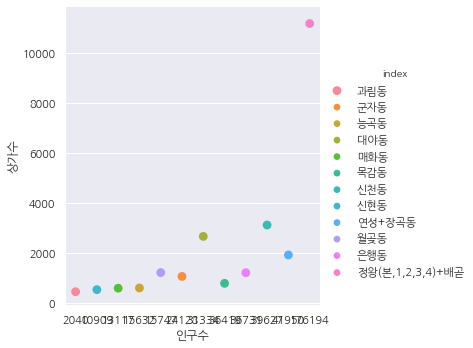

In [83]:
#시각화
sns.catplot(x='인구수', y='상가수',hue='index', data=df_concat, kind='point')
plt.show()

## 2차 분석 - 서울시 강남역과 정왕동의 상권 비교(음식 분야)

1) 정왕동, 음식 관련 시흥시 상권 데이터

In [84]:
is_jeong = store_df1['동'] == '정왕동'
is_food = store_df1['대분류명'] == '음식'

In [85]:
store_df3 = store_df1[is_jeong & is_food]

In [86]:
store_df3

,상호명,대분류명,중분류명,소분류명,표준산업분류명,동
12735,막걸리와전,음식,유흥주점,민속주점,기타 주점업,정왕동
12736,헬로방방배곧점,음식,커피점/카페,커피전문점/카페/다방,비알콜 음료점업,정왕동
12738,하의도횟집,음식,일식/수산물,횟집,한식 음식점업,정왕동
12739,전주식당,음식,한식,한식/백반/한정식,한식 음식점업,정왕동
12742,갯마을,음식,일식/수산물,음식점-일식,일식 음식점업,정왕동
...,...,...,...,...,...,...
23807,오박사영양탕,음식,닭/오리요리,삼계탕전문,한식 음식점업,정왕동
23816,엄마손밥상,음식,한식,한식/백반/한정식,한식 음식점업,정왕동
23821,구이야,음식,한식,한식/백반/한정식,한식 음식점업,정왕동
23828,바비큐보스,음식,닭/오리요리,후라이드/양념치킨,치킨 전문점,정왕동


In [87]:
frequency2 = store_df3['중분류명'].value_counts()
frequency2

한식         1371
유흥주점        773
일식/수산물      369
닭/오리요리      334
분식          334
커피점/카페      190
패스트푸드       121
중식          119
제과제빵떡케익      96
별식/퓨전요리      92
양식           70
기타음식업        48
부페           26
음식배달서비스       7
Name: 중분류명, dtype: int64

In [88]:
siheung = pd.DataFrame(frequency2)
siheung.rename(columns={'중분류명':'count'}, inplace=True)
siheung

,count
한식,1371
유흥주점,773
일식/수산물,369
닭/오리요리,334
분식,334
커피점/카페,190
패스트푸드,121
중식,119
제과제빵떡케익,96
별식/퓨전요리,92


In [89]:
siheung = siheung.reset_index()

In [90]:
siheung

,index,count
0,한식,1371
1,유흥주점,773
2,일식/수산물,369
3,닭/오리요리,334
4,분식,334
5,커피점/카페,190
6,패스트푸드,121
7,중식,119
8,제과제빵떡케익,96
9,별식/퓨전요리,92


In [111]:
df_concat.to_csv("시흥시+정왕동+음식+상권데이터.csv", mode='w', encoding='utf-8-sig')

2) 강남역, 음식 관련 서울시 상권 데이터

In [91]:
seoul = pd.read_excel('c:/서울시_상권분석.xlsx')
seoul

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,2018,1,D,발달상권,1001066,서울 강남구 강남역,CS100003,일식음식점,24,28,7,2,4,1,4
1,2018,1,D,발달상권,1001066,서울 강남구 강남역,CS100009,호프-간이주점,17,22,5,1,0,0,5
2,2018,1,D,발달상권,1001078,서울 강남구 강남역_2,CS100002,중식음식점,11,12,0,0,8,1,1
3,2018,1,D,발달상권,1001066,서울 강남구 강남역,CS100002,중식음식점,11,11,0,0,9,1,0
4,2018,1,D,발달상권,1001078,서울 강남구 강남역_2,CS100001,한식음식점,122,147,5,7,4,6,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2018,4,D,발달상권,1001078,서울 강남구 강남역_2,CS100003,일식음식점,20,24,8,2,4,1,4
104,2018,4,D,발달상권,1001062,서울 강남구 강남역_1,CS100006,패스트푸드점,3,5,0,0,0,0,2
105,2018,4,D,발달상권,1001066,서울 강남구 강남역,CS100006,패스트푸드점,4,8,0,0,0,0,4
106,2018,4,D,발달상권,1001066,서울 강남구 강남역,CS100010,커피-음료,24,39,3,1,8,3,15


In [92]:
seoul = seoul.loc[:, ['서비스_업종_코드_명', '점포_수']]

In [93]:
seoul = seoul.groupby('서비스_업종_코드_명').sum()

In [94]:
seoul = seoul.reset_index()

In [95]:
seoul

,서비스_업종_코드_명,점포_수
0,양식음식점,274
1,육류판매,40
2,일식음식점,235
3,제과점,41
4,중식음식점,114
5,커피-음료,363
6,패스트푸드점,63
7,한식음식점,1268
8,호프-간이주점,309


In [112]:
df_concat.to_csv("서울시+강남역+음식+상권데이터.csv", mode='w', encoding='utf-8-sig')

3) 데이터 분석

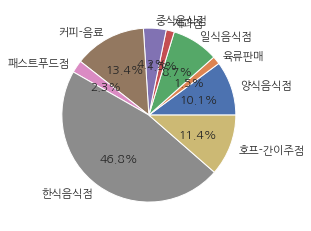

In [96]:
plt.pie(seoul['점포_수'], labels=seoul['서비스_업종_코드_명'], autopct='%.1f%%')
plt.show()

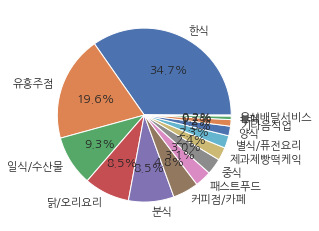

In [98]:
plt.pie(siheung['count'], labels=siheung['index'], autopct='%.1f%%')
plt.show()